In [1]:
import numpy as np

REINFORCE_returns = [np.load(f'logs/returns_REINFORCE_{i}.npy').item()['returns'] for i in range(5)]
AC_returns = [np.load(f'logs/returns_ActorCritic_{i}.npy').item()['returns'] for i in range(5)]

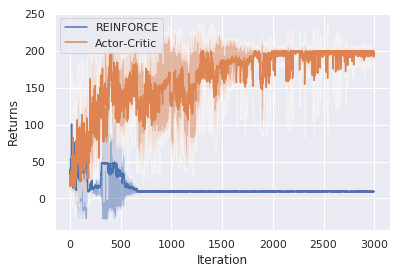

In [3]:
from lagom.core.plotter import CurvePlot

plot = CurvePlot()
plot.add('REINFORCE', REINFORCE_returns)
plot.add('Actor-Critic', AC_returns)
ax = plot(xlabel='Iteration', ylabel='Returns')

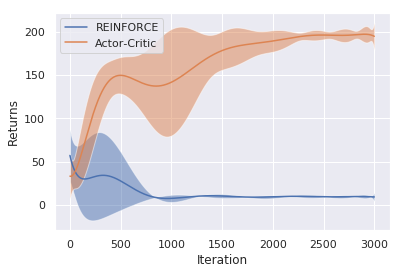

In [4]:
from lagom.core.transform import PolySmooth

smooth = PolySmooth()

REINFORCE_returns = [smooth(d) for d in REINFORCE_returns]
AC_returns = [smooth(d) for d in AC_returns]

plot = CurvePlot()
plot.add('REINFORCE', REINFORCE_returns)
plot.add('Actor-Critic', AC_returns)
ax = plot(xlabel='Iteration', ylabel='Returns')

In [7]:
import torch
import torchvision

'0.2.1'